**<center> <span style="color:#A04000;font-family:serif; font-size:34px;"> CUSTOMER CHURN PREDICTION 📈</span> </center>**

# <span style="font-family:serif; font-size:28px;"> Content </span>
1. [Import Libraries](#1)
2. [Loading Data](#2)
3. [Data Processing](#3)
4. [EDA](#4)
    * [Visualiation](#5)
    * [Missing Value](#6)
    * [Skewness](#7)
    * [Encoding](#8)
    * [Scaling](#9)
   

<a id="1"></a>
# <span style="font-family:serif; font-size:28px;"> 1. Import Libraries</span>
<a id="Libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

import optuna

import tensorflow as tf

import warnings as wr
wr.filterwarnings('ignore')

2024-03-25 06:40:11.324222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 06:40:11.324343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 06:40:11.476057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id="2"></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading Data</span>

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7043
Number of columns: 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<a id="3"></a>
# <span style="font-femaily:serif; font-size:28px;"> 3. Data Preprocessing </span>
<a id="processing"></a>

In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* Total Charges will be numerial and Senior Citizen will be caterorial

In [8]:
print(df['SeniorCitizen'].unique())
print(df['TotalCharges'].nunique())

[0 1]
6531


#### Type Conversion

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str) # str conversion

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN) # This numerial col being object due to a white space, which replaced by np.NaN
df['TotalCharges'] = df['TotalCharges'].astype(float)        # Make it float
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median()) # Fill the missing vales by medina which is outlier proved

#### Finding Unique columns & Process it- Categorial Cols

In [11]:
# Unique Values by column 
unique_values = {column:list(df[column].unique())
                            for column in df.select_dtypes(object).columns
                            }
for key, value in unique_values.items():
    print(f'{key}:{value}')

gender:['Female', 'Male']
SeniorCitizen:['0', '1']
Partner:['Yes', 'No']
Dependents:['No', 'Yes']
PhoneService:['No', 'Yes']
MultipleLines:['No phone service', 'No', 'Yes']
InternetService:['DSL', 'Fiber optic', 'No']
OnlineSecurity:['No', 'Yes', 'No internet service']
OnlineBackup:['Yes', 'No', 'No internet service']
DeviceProtection:['No', 'Yes', 'No internet service']
TechSupport:['No', 'Yes', 'No internet service']
StreamingTV:['No', 'Yes', 'No internet service']
StreamingMovies:['No', 'Yes', 'No internet service']
Contract:['Month-to-month', 'One year', 'Two year']
PaperlessBilling:['Yes', 'No']
PaymentMethod:['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn:['No', 'Yes']


- It found that there are number of columns having same values with redundency mode like :
- No & No phone severice in the col 'MultipleLines" can be merged into one
- No & No Internet service in the col ' OnlineSecurity" can eb merged into one
- This similar merging can be efficent for ml model

In [12]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 
                                                                'DeviceProtection', 'TechSupport', 
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')


In [13]:
# Check the clean merged output
unique_values = {column:list(df[column].unique())
                            for column in df.select_dtypes(object).columns
                            }
for key, value in unique_values.items():
    print(f'{key}:{value}')

gender:['Female', 'Male']
SeniorCitizen:['0', '1']
Partner:['Yes', 'No']
Dependents:['No', 'Yes']
PhoneService:['No', 'Yes']
MultipleLines:['No', 'Yes']
InternetService:['DSL', 'Fiber optic', 'No']
OnlineSecurity:['No', 'Yes']
OnlineBackup:['Yes', 'No']
DeviceProtection:['No', 'Yes']
TechSupport:['No', 'Yes']
StreamingTV:['No', 'Yes']
StreamingMovies:['No', 'Yes']
Contract:['Month-to-month', 'One year', 'Two year']
PaperlessBilling:['Yes', 'No']
PaymentMethod:['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn:['No', 'Yes']


### Numerical Cols

In [14]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

- Lets replace 0 with its median

In [15]:
df['tenure'] = df['tenure'].replace(0, np.NaN)
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [16]:
# Check there is no 0
df['tenure'].value_counts()

tenure
1.0     613
72.0    362
2.0     238
3.0     200
4.0     176
       ... 
38.0     59
28.0     57
39.0     56
44.0     51
36.0     50
Name: count, Length: 72, dtype: int64

<a id ="4"></a>
# <span style="font-family:serif; font-size:28px;"> 4. EDA </span>
<a id ="eda"></a>

<a id = "5" ></a>
# <span style="font-family:serif; font-size:25px;"> Visualization</span>
<a id="viz"></a>

In [17]:
# Target
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
1869/ (5174+1869)*100 # churn rate

26.536987079369588

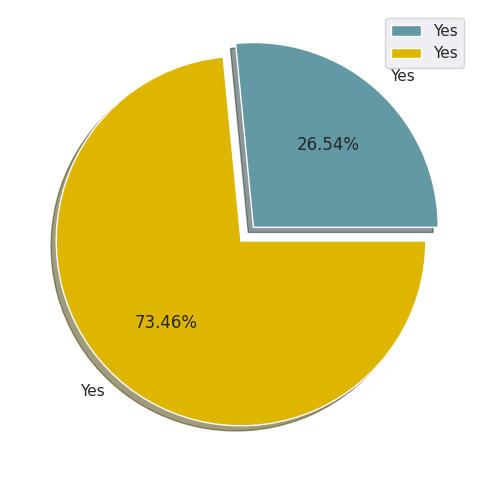

In [19]:
plt.figure(figsize=(10,6))
churn = [1869, 5174]
labels = ["Yes","Yes"]
explode = [0.1,0]
plt.pie(churn, labels=labels, explode=explode, autopct="%1.2f%%",
       shadow=True, colors=['#6299A5','#DEB600']
       )
plt.legend()
plt.show()

- Its found that dataset is imbalance, which must be concerning/ consideration while spliting data for training & testing

#### Numerial col plots

In [20]:
df.select_dtypes('float64').columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

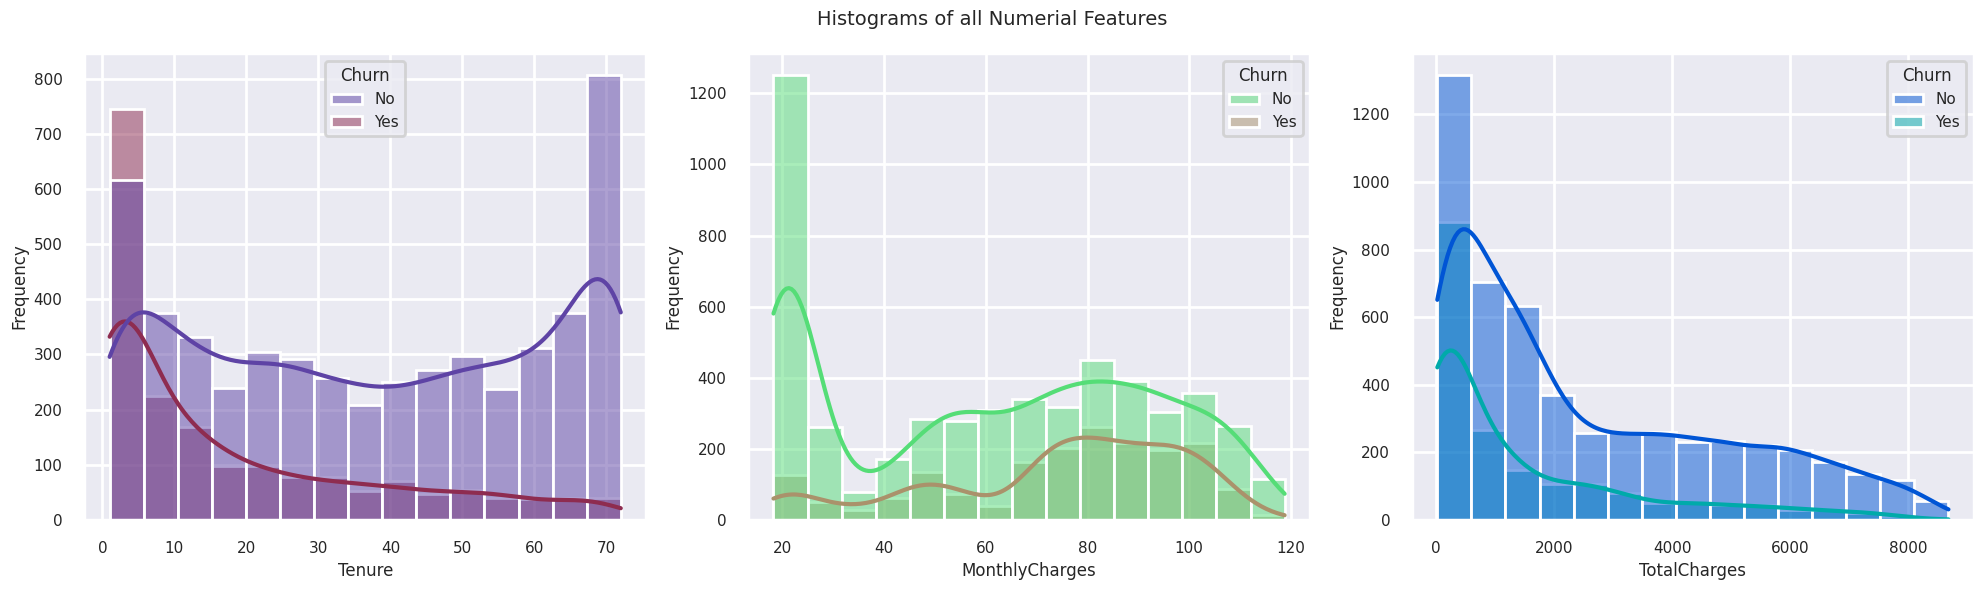

In [21]:
sns.set_context('poster', font_scale=0.5)
fig, ax = plt.subplots(1, 3, figsize=(20,6))

plt.suptitle('Histograms of all Numerial Features', fontsize=14)

ax1 = sns.histplot(x=df['tenure'], color='teal', hue=df['Churn'], ax=ax[0], bins=15, kde=True, palette='twilight')
ax1.set(xlabel="Tenure", ylabel='Frequency')

ax2 = sns.histplot(x=df['MonthlyCharges'], color='teal', hue=df['Churn'], ax=ax[1], bins=15, kde=True, palette='terrain')
ax2.set(xlabel="MonthlyCharges", ylabel='Frequency')

ax3 = sns.histplot(x=df['TotalCharges'], color='teal', hue=df['Churn'], ax=ax[2], bins=15, kde=True, palette='winter')
ax3.set(xlabel='TotalCharges', ylabel='Frequency')

plt.tight_layout()
plt.show()

* If customers stays longer period with company, the less chance to churn
* There is higher churn shown when Montly Charges range (80-90)
* Skeness shown in Total Charges columns, so log transformation required for this column

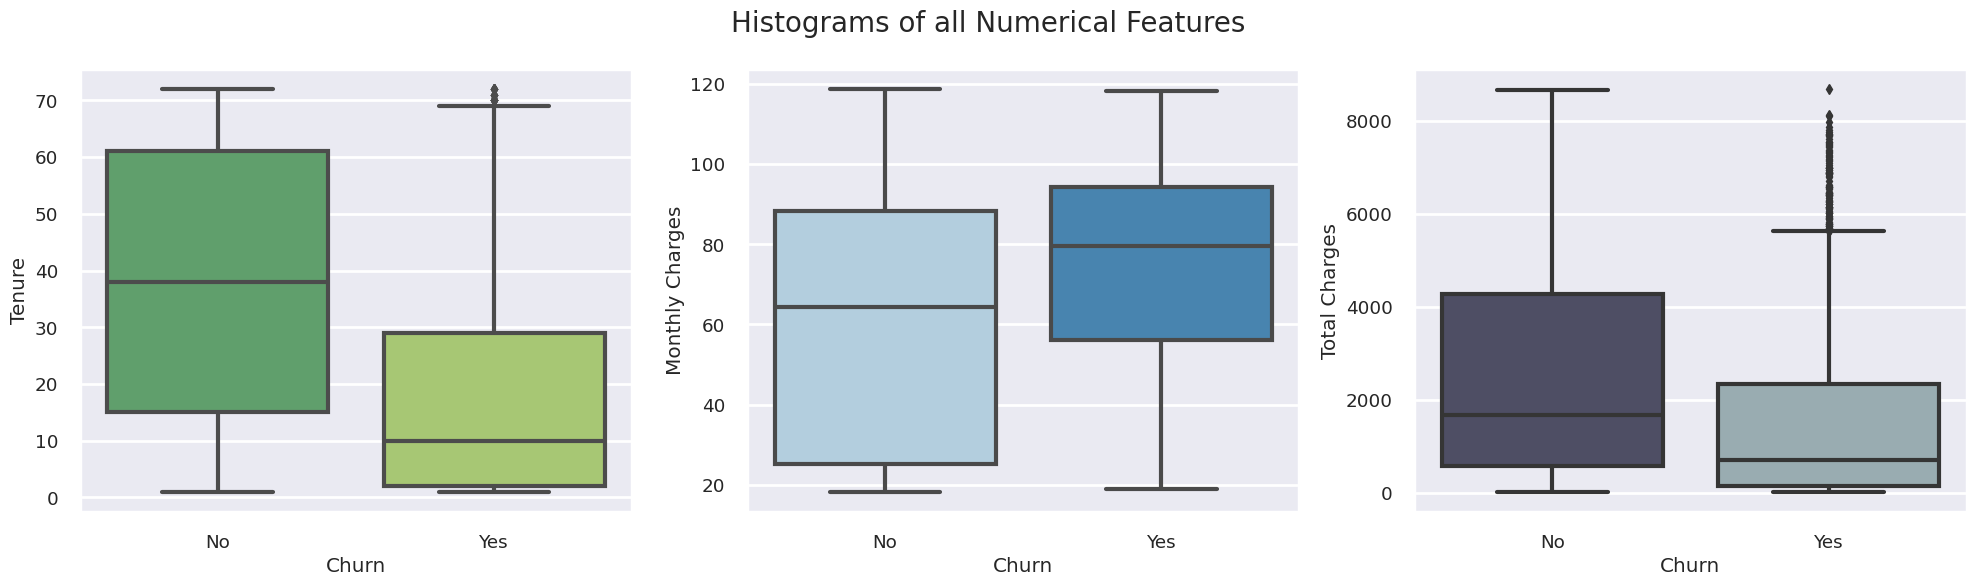

In [22]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.boxplot(y = df['tenure'], x= df['Churn'], ax= ax[0], palette= 'summer')
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = df['MonthlyCharges'], x= df['Churn'], ax= ax[1], palette= 'Blues')
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = df['TotalCharges'], x= df['Churn'], ax= ax[2], palette= 'bone')
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

#### Correlation

In [23]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
# plt.show()

Let us also check out the how our categorical variables change based on our target variable

### Demographic Inforamtion

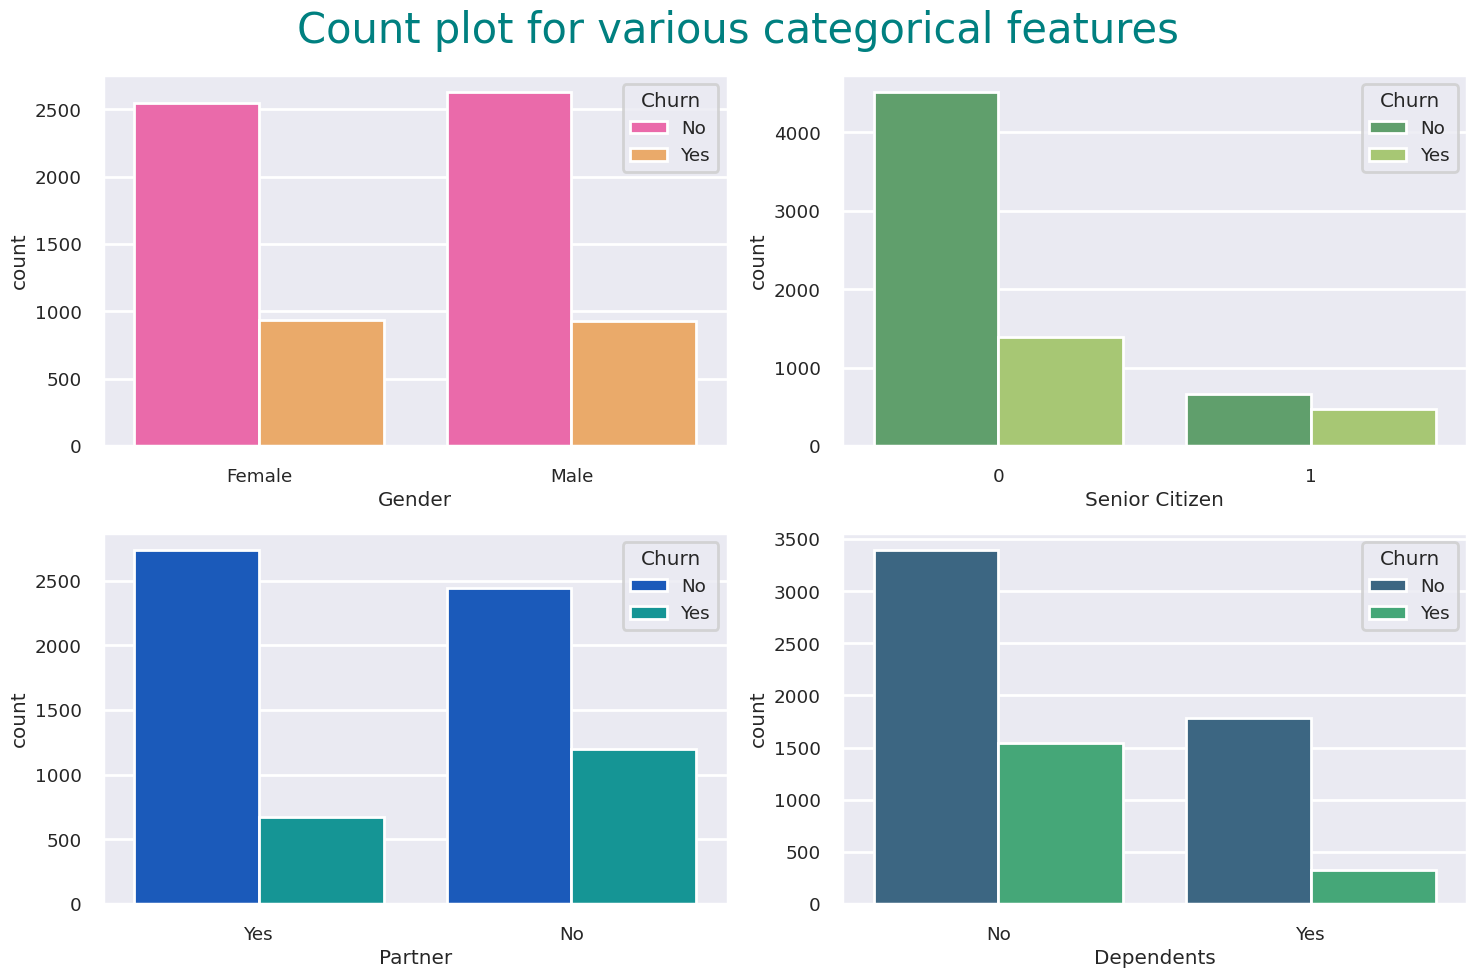

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'summer')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'winter')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Based on the `Demographic Information`, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

### Categorical Features Distribution- Phase1

In [25]:
df.select_dtypes('object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

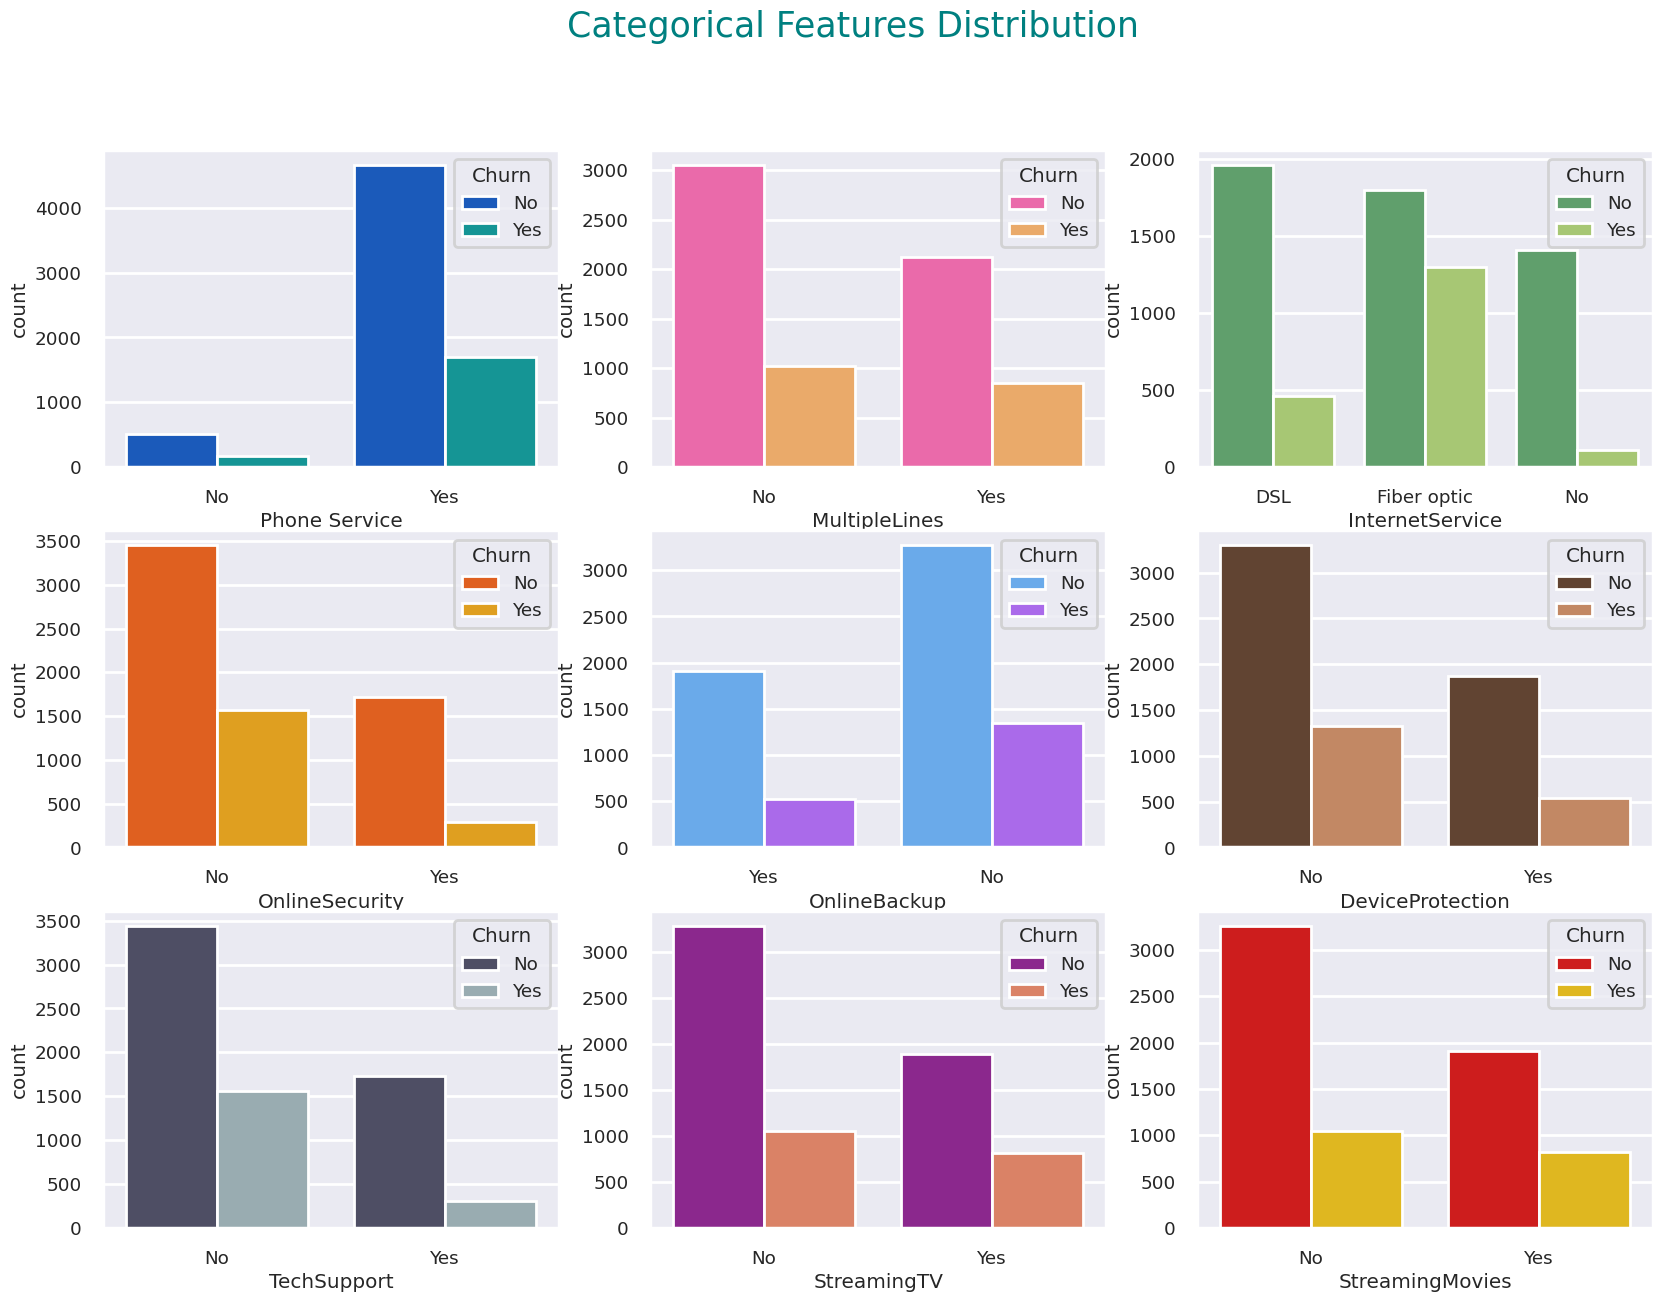

In [26]:
fig, ax = plt.subplots(3,3, figsize=(20,14))
plt.suptitle("Categorical Features Distribution", fontsize=25, color='teal')

# First Row -- cols (0,1,2)
ax1 = sns.countplot(x='PhoneService', data=df, hue='Churn', ax=ax[0,0], palette='winter')
ax1.set(xlabel="Phone Service")

ax2 = sns.countplot(x='MultipleLines', data=df, hue='Churn', ax=ax[0,1], palette='spring')
ax2.set(xlabel="MultipleLines")

ax3 = sns.countplot(x='InternetService', data=df, hue="Churn", ax=ax[0,2], palette='summer')
ax3.set(xlabel='InternetService')

# Second Row -- cols (0,1,2)
ax4 = sns.countplot(x='OnlineSecurity', data=df, hue='Churn', ax=ax[1,0], palette='autumn')
ax4.set(xlabel='OnlineSecurity')

ax5 = sns.countplot(x='OnlineBackup', data=df, hue='Churn', ax=ax[1,1], palette='cool')
ax5.set(xlabel='OnlineBackup')

ax6 = sns.countplot(x='DeviceProtection', data=df, hue='Churn', ax=ax[1,2], palette='copper')
ax6.set(xlabel='DeviceProtection')

# Third Row -- cols (0,1,2)
ax7 = sns.countplot(x='TechSupport', data=df, hue='Churn', ax=ax[2,0], palette='bone')
ax7.set(xlabel='TechSupport')

ax8 = sns.countplot(x='StreamingTV', data=df, hue='Churn', ax=ax[2,1], palette='plasma')
ax8.set(xlabel='StreamingTV')

ax9 = sns.countplot(x='StreamingMovies', data=df, hue='Churn', ax=ax[2,2], palette='hot')
ax9.set(xlabel='StreamingMovies')


plt.show()


- Customer having Fibre optic more likely to churn

### Categorical Features Distribution- Phase2

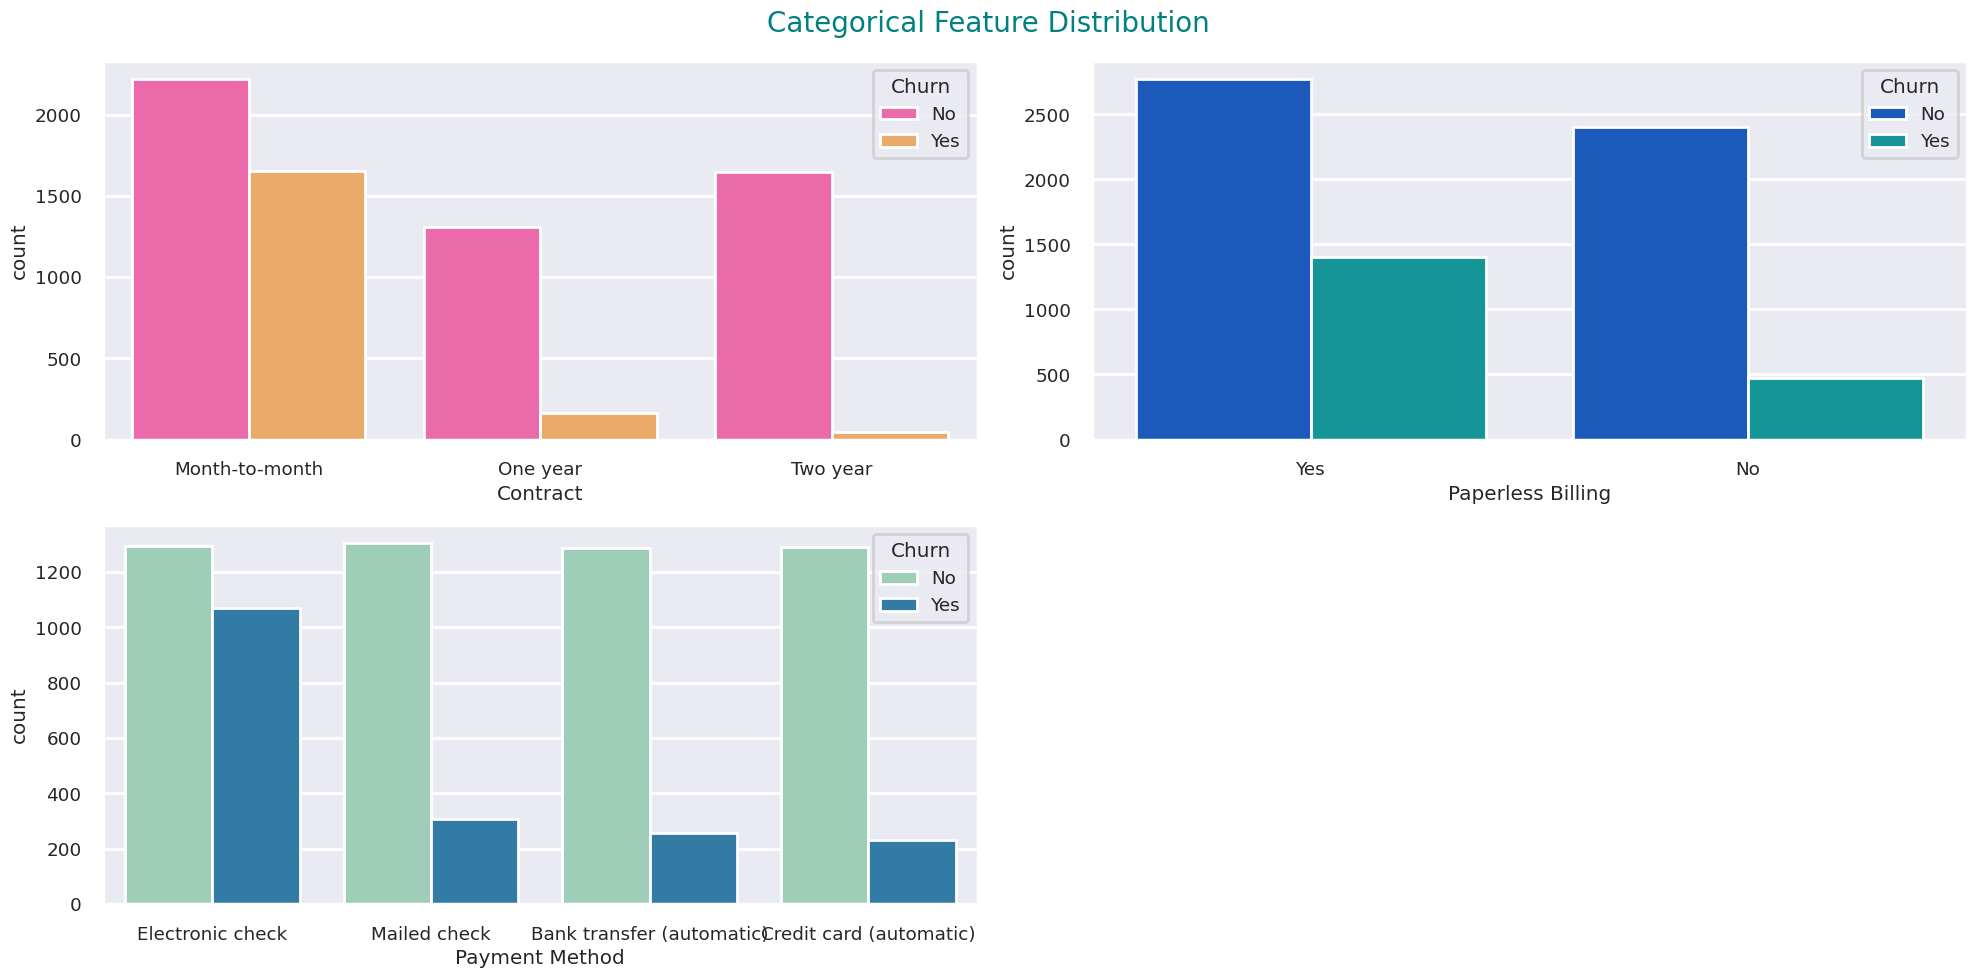

In [27]:
fig, ax = plt.subplots(2,2, figsize=(20,10))         # 3 feature lelf, lets take 2x2
ax[1,1].axis('off')
plt.suptitle('Categorical Feature Distribution', fontsize=20, color='teal')

ax1 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'YlGnBu')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

Based on the `Account` information, customers having longer contracts are much more less likely to churn. Also, customers who use Electronic Check as a payment method have higher chances of churning then customers who use other methods

<a id="6"></a>
# <span style="font-family:serif; font-size:18px;"> Missing Value Treatment</span>
<a id="missing"></a>

In [28]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id="7"></a>
# <span style="font-family:serif; font-size:25px;"> Skewness</span>
<a id='skew'></a>

In [29]:
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df

,Feature,Skew,Absolute Skew
0,tenure,0.238505,0.238505
1,MonthlyCharges,-0.220477,0.220477
2,TotalCharges,0.963584,0.963584


Total Charges column is clearly skewed as we also saw in the histogram, so lets apply log transformation to it

In [30]:
df['TotalCharges'] = np.log(df['TotalCharges'])

In [31]:
# Verified Skewness after log tranformation
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df

,Feature,Skew,Absolute Skew
0,tenure,0.238505,0.238505
1,MonthlyCharges,-0.220477,0.220477
2,TotalCharges,-0.754838,0.754838


<a id="8"></a>
# <span style="font-family:serif; font-size:25px;"> Categorical Encoding</span>
<a id='encode'></a>

In this dataset, we have lots of categorical columns and some follow a certain order. So we will need to apply different kinds of encoding to different categorical features

#### Binary Encoding

In [32]:
# Identify binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for column in binary_cols:
    df[column]= le.fit_transform(df[column])

In [33]:
# Encode labels in column 'PaymentMethods'. 
df['PaymentMethod']= le.fit_transform(df['PaymentMethod'])

#### One Hot Encoding

In [34]:
dummies_payment = pd.get_dummies(df['PaymentMethod'], drop_first=True)
data = pd.concat([df, dummies_payment], axis=1)
data.drop('PaymentMethod', axis=1, inplace=True)

#### Ordinal Encoding

In [35]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

df['InternetService'] = df['InternetService'].apply(lambda x: internet_ordering.index(x))
df['Contract'] = df['Contract'].apply(lambda x: contract_ordering.index(x))

In [36]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,0,1,0,1,0,0,0,0,0,1,2,29.85,3.396185,0
1,1,0,0,0,34.0,1,0,1,1,0,1,0,0,0,1,0,3,56.95,7.544068,0
2,1,0,0,0,2.0,1,0,1,1,1,0,0,0,0,0,1,3,53.85,4.683519,1
3,1,0,0,0,45.0,0,0,1,1,0,1,1,0,0,1,0,0,42.30,7.517928,0
4,0,0,0,0,2.0,1,0,2,0,0,0,0,0,0,0,1,2,70.70,5.021575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,1,1,0,1,1,1,1,1,1,3,84.80,7.596141,0
7039,0,0,1,1,72.0,1,1,2,0,1,1,0,1,1,1,1,1,103.20,8.904209,0
7040,0,0,1,1,11.0,0,0,1,1,0,0,0,0,0,0,1,2,29.60,5.847739,0
7041,1,1,1,0,4.0,1,1,2,0,0,0,0,0,0,0,1,3,74.40,5.725544,1


<a id="9"></a>
# <span style="font-family:serif; font-size:25px;"> Scaling </span>
<a id='scaling'></a>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [38]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,0,1,0,1,0,0,0,0,0,1,2,29.85,3.396185,0
1,1,0,0,0,34.0,1,0,1,1,0,1,0,0,0,1,0,3,56.95,7.544068,0
2,1,0,0,0,2.0,1,0,1,1,1,0,0,0,0,0,1,3,53.85,4.683519,1
3,1,0,0,0,45.0,0,0,1,1,0,1,1,0,0,1,0,0,42.30,7.517928,0
4,0,0,0,0,2.0,1,0,2,0,0,0,0,0,0,0,1,2,70.70,5.021575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,1,1,0,1,1,1,1,1,1,3,84.80,7.596141,0
7039,0,0,1,1,72.0,1,1,2,0,1,1,0,1,1,1,1,1,103.20,8.904209,0
7040,0,0,1,1,11.0,0,0,1,1,0,0,0,0,0,0,1,2,29.60,5.847739,0
7041,1,1,1,0,4.0,1,1,2,0,0,0,0,0,0,0,1,3,74.40,5.725544,1


* Here target column is object, so before scaling this type must be convert into numeric first!

In [39]:
df['Churn'] = df['Churn'].astype(int)

### Scaling

In [ ]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [59]:
sc = StandardScaler()
X = sc.fit_transform(X)

<a id="10"></a>
# <span style="font-family:serif; font-size:25px;"> Spliting </span>
<a id='Split'></a>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, stratify= y, random_state= 42)

In [61]:
print(y_train.value_counts())
print(y_test.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64
Churn
0    1035
1     374
Name: count, dtype: int64


<a id="11"></a>
# <span style="font-family:serif; font-size:28px;"> Modeling </span>
<a id='Model'></a>

In [65]:
models = {
    'logistic regression' : LogisticRegression(),
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    #'lightbgm' : LGBMClassifier(),
    'gradient boosing' : GradientBoostingClassifier(),
    'naive bayes' : GaussianNB(),       
    'random forest' : RandomForestClassifier()
}

In [66]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

logistic regression trained
xgboost trained
catboost trained
gradient boosing trained
naive bayes trained
random forest trained


In [67]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

In [68]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic regression : 0.8499798925512794
----------------
xgboost : 0.822858079115632
----------------
catboost : 0.8409925428943226
----------------
gradient boosing : 0.8461677503981667
----------------
naive bayes : 0.8350095597859204
----------------
random forest : 0.8241815981350621


Logistic regression seems to be the winner here. Let us perform some hyperparameter optimization and also check its accuracy on the test set

## **Hyperparameter Optimization**

In [69]:
def lr_objective(trial):
    tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
    C = trial.suggest_float('C', 0, 0.1)
    max_iter = trial.suggest_int('max_iter', 50, 600)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    model = LogisticRegression(
        solver= 'liblinear',
        penalty = penalty,
        tol= tol,
        C= C,
        max_iter= max_iter
    )

    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)

    return np.mean(cv_score)

study = optuna.create_study(direction= 'maximize')
study.optimize(lr_objective, n_trials= 100)

[I 2024-03-25 06:48:16,873] A new study created in memory with name: no-name-e7daa7e5-fc0f-45a2-be3c-db01502dcf1d
[I 2024-03-25 06:48:17,284] Trial 0 finished with value: 0.8490756147252622 and parameters: {'tol': 0.00012712578786593475, 'C': 0.011034933438605388, 'max_iter': 140, 'penalty': 'l2'}. Best is trial 0 with value: 0.8490756147252622.
[I 2024-03-25 06:48:17,822] Trial 1 finished with value: 0.8497388063720666 and parameters: {'tol': 2.5288008063755693e-05, 'C': 0.053752215592173004, 'max_iter': 549, 'penalty': 'l2'}. Best is trial 1 with value: 0.8497388063720666.
[I 2024-03-25 06:48:18,560] Trial 2 finished with value: 0.8498092602052993 and parameters: {'tol': 3.6774364640807625e-07, 'C': 0.0920611914030054, 'max_iter': 382, 'penalty': 'l2'}. Best is trial 2 with value: 0.8498092602052993.
[I 2024-03-25 06:48:19,047] Trial 3 finished with value: 0.8498767793526867 and parameters: {'tol': 0.0003548032321498582, 'C': 0.057474557804865746, 'max_iter': 490, 'penalty': 'l1'}. B

In [49]:
study.best_params

{'tol': 0.024005539793899584,
 'C': 0.0936541668866604,
 'max_iter': 446,
 'penalty': 'l1'}

In [70]:
lr = LogisticRegression(
    solver = 'liblinear',
    tol = 0.008408625396645686,
    C = 0.08440490508701622,
    max_iter = 434,
    penalty = 'l1')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [71]:
print("Actual values    :", y_test.values[:20])
print("Predicted values :", y_pred[:20])

Actual values    : [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
Predicted values : [0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [72]:
predictions = pd.DataFrame({'Probability of Customer Churning': y_pred_prob, 'Probability of customer not churning' : 1 - y_pred_prob})
predictions.head()

,Probability of Customer Churning,Probability of customer not churning
0,0.063846,0.936154
1,0.729176,0.270824
2,0.067883,0.932117
3,0.281655,0.718345
4,0.034831,0.965169


In [73]:
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred_prob), 3))

ROC AUC Score: 0.848


We have a ROC score of 0.85 which is similar to what we got earlier

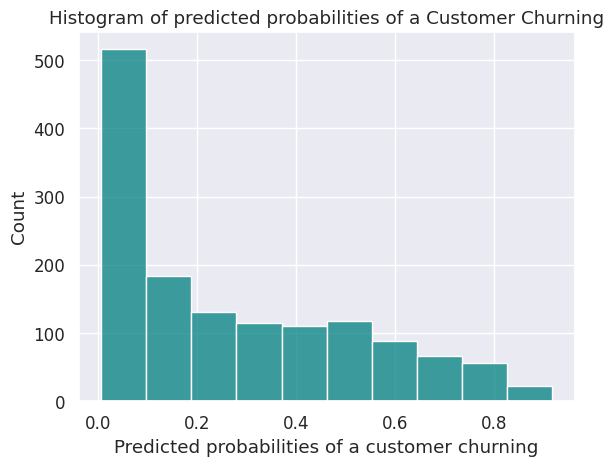

In [74]:
sns.set_context('notebook', font_scale= 1.1)
sns.histplot(y_pred_prob, bins= 10, color= 'teal')
plt.title('Histogram of predicted probabilities of a Customer Churning')
plt.xlabel('Predicted probabilities of a customer churning')
plt.show()

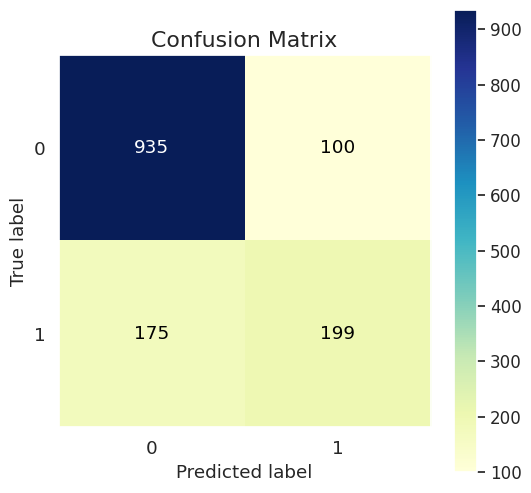

In [75]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlGnBu');

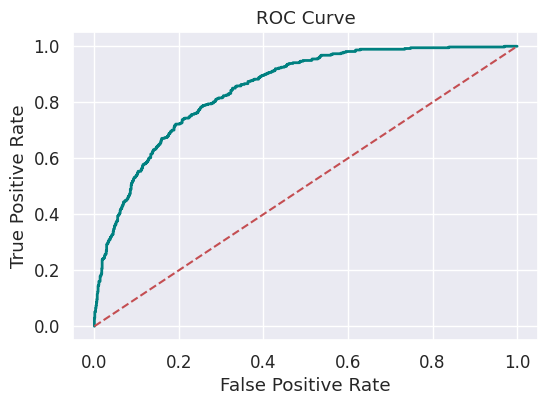

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### ANN

In [77]:
X_train.shape

(5634, 19)

In [80]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(19,)),  # Specify input shape as a tuple,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

BATCH_SIZE = 100
EPOCHS = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks = early_stopping
)

In [81]:
history.history.keys()

dict_keys(['auc', 'loss', 'val_auc', 'val_loss'])

### Plotting Results

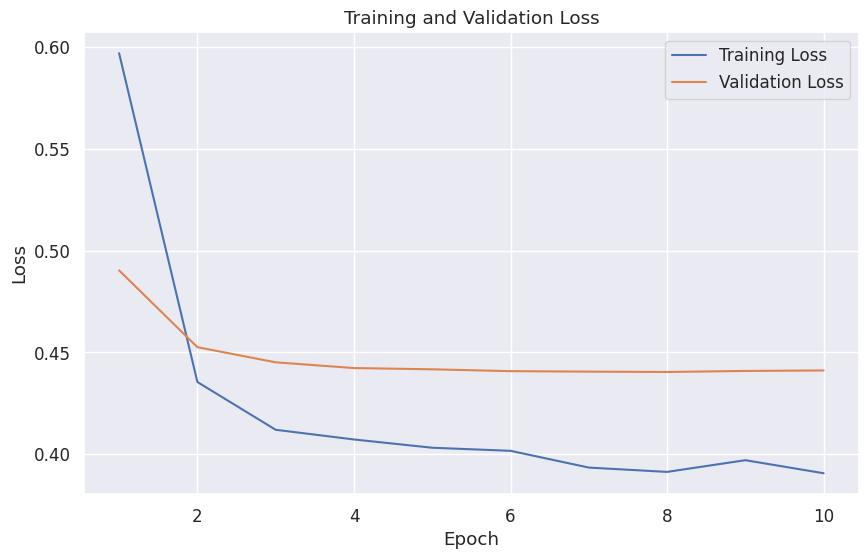

In [82]:
plt.figure(figsize=(10,6))
epochs = range(1, EPOCHS+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [83]:
np.argmin(val_loss)

7

Validation loss isn't changing that much after 7th epoch and our model has probably started overfitting after that

In [84]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8414 - loss: 0.4227


[0.4086797833442688, 0.8433232307434082]

We have an auc of 0.84 which is definitely not that bad, so our neural network seems to be doing a good job

## Working

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate beta-distributed random variable
data = np.random.beta(a=4, b=15, size=300)
data_log = np.log(data)  # Log-transformed data

# Create side-by-side histograms
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')
plt.show()
